In [6]:
import cv2
import os
from matplotlib import pyplot as plt
import statistics
import numpy as np


In [7]:
def rle_encode(data):
    encoding = []
    i = 0
    while i < len(data):
        count = 1
        while i + count < len(data) and data[i] == data[i + count]:
            count += 1
        encoding.append((data[i], count))
        i += count
    return encoding

def rle_decode(encoding):
    total_length = sum(count for _, count in encoding)
    data = np.empty(total_length, dtype=int)
    
    index = 0
    for value, count in encoding:
        data[index:index+count] = value
        index += count
    
    return data

In [8]:
def compute_stats(data):
    return [
        f"{min(data):.2f}",
        f"{max(data):.2f}",
        f"{statistics.mean(data):.2f}",
        f"{statistics.median(data):.2f}",
        f"{statistics.stdev(data):.2f}"
    ]

In [9]:
directory = "../asset"
original_sizes = []
encoded_sizes = []
compression_ratios = []

In [10]:
image_filenames = [filename for filename in os.listdir(directory) if filename.endswith(".jpg")]
print(f"total images: {len(image_filenames)}")
increment = len(image_filenames) / 10
for idx, filename in enumerate(image_filenames):
    if idx % int(increment) == 0:
        percent = idx / len(image_filenames) * 100
        print(f"{percent:.0f}%")
    image_path = os.path.join(directory, filename)
    img = cv2.imread(image_path)
    if img is not None:
        channels = cv2.split(img)
        encoded = []
        for channel in channels:
            channel = channel.flatten()
            encoded.append(rle_encode(channel))
        original_size = img.nbytes / 1024
        encoded_size = sum(len(e) * 2 for e in encoded) / 1024
        compression_ratio = sum(len(e) * 2 for e in encoded) / img.nbytes
        original_sizes.append(original_size)
        encoded_sizes.append(encoded_size)
        compression_ratios.append(compression_ratio)

total images: 757
0%
10%
20%
30%
40%
50%
59%
69%
79%
89%
99%


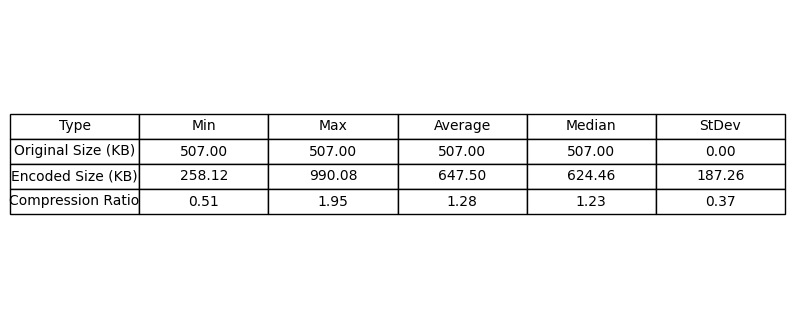

In [11]:
stats = {
    "Original Size (KB)": compute_stats(original_sizes),
    "Encoded Size (KB)": compute_stats(encoded_sizes),
    "Compression Ratio": compute_stats(compression_ratios)
}
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
column_labels = ["Type", "Min", "Max", "Average", "Median", "StDev"]
table_data = [[key] + value for key, value in stats.items()]
table = ax.table(cellText=table_data, colLabels=column_labels, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.show()